Sebastian Raschka, 2015  
`mlxtend`, a library of extension and helper modules for Python's data analysis and machine learning libraries

- GitHub repository: https://github.com/rasbt/mlxtend
- Documentation: http://rasbt.github.io/mlxtend/

View this page in [jupyter nbviewer](http://nbviewer.ipython.org/github/rasbt/mlxtend/blob/master/docs/sources/evaluate/plot_decision_regions.ipynb)

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p matplotlib,numpy,scipy

Sebastian Raschka 
last updated: 2016-10-28 

CPython 3.5.2
IPython 5.1.0

matplotlib 1.5.1
numpy 1.11.1
scipy 0.18.1


In [2]:
%matplotlib inline

# Contigency Table for McNemar's Test

Function to compute a 2x2 contingency table for McNemar's Test

> `from mlxtend.evaluate import mcnemar_table`    

## Overview

###  Contigency Table for McNemar's Test

A 2x2 contigency table as being used in a McNemar's Test ([`mlxtend.evaluate.mcnemar_test`](evaluate/mcnemar_test.md)) is a useful aid for comparing two different models. In contrast to a typical confusion matrix, this table compares two models to each other rather than showing the false positives, true positives, false negatives, and true negatives of a single model's predictions:

![](./mcnemar_table_files/mcnemar_contingency_table.png)

For instance, given that 2 models have a accuracy of with a 99.7% and 99.6% a 2x2 contigency table can provide further insights for model selection.


![](./mcnemar_table_files/mcnemar_contingency_table_ex1.png)

In both subfigure A and B, the predictive accuracies of the two models are as follows:

- model 1 accuracy: 9,960 / 10,000 = 99.6%
- model 2 accuracy: 9,970 / 10,000 = 99.7%

Now, in subfigure A, we can see that model 2 got 11 predictions right that model 1 got wrong. Vice versa, model 2 got 1 prediction right that model 2 got wrong. Thus, based on this 11:1 ratio, we may conclude that model 2 performs substantially better than model 1. However, in subfigure B, the ratio is 25:15, which is less conclusive about which model is the better one to choose.

### References

- McNemar, Quinn, 1947. "[Note on the sampling error of the difference between correlated proportions or percentages](http://link.springer.com/article/10.1007%2FBF02295996)". Psychometrika. 12 (2): 153–157.
- https://en.wikipedia.org/wiki/McNemar%27s_test

## Examples

### Example 1 - 2x2 Contigency Table

In [3]:
import numpy as np
from mlxtend.evaluate import mcnemar_table

y_true = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

y_mod1 = np.array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0])
y_mod2 = np.array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

tb = mcnemar_table(y_target=y_true, 
                   y_model1=y_mod1, 
                   y_model2=y_mod2)

tb

array([[4, 1],
       [2, 3]])

To visualize (and better interpret) the contigency table via matplotlib, we can use the `checkerboard_plot` function:

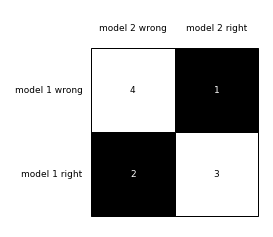

In [4]:
from mlxtend.plotting import checkerboard_plot
import matplotlib.pyplot as plt

brd = checkerboard_plot(tb,
                        figsize=(3, 3),
                        fmt='%d',
                        col_labels=['model 2 wrong', 'model 2 right'],
                        row_labels=['model 1 wrong', 'model 1 right'])
plt.show()

## API

In [5]:
with open('../../api_modules/mlxtend.evaluate/mcnemar_table.md', 'r') as f:
    s = f.read() 
print(s)

## mcnemar_table

*mcnemar_table(y_target, y_model1, y_model2)*

Compute a 2x2 contigency table for McNemar's test.

**Parameters**

- `y_target` : array-like, shape=[n_samples]

    True class labels as 1D NumPy array.

- `y_model1` : array-like, shape=[n_samples]

    Predicted class labels from model as 1D NumPy array.

- `y_model2` : array-like, shape=[n_samples]

    Predicted class labels from model 2 as 1D NumPy array.

**Returns**

- `tb` : array-like, shape=[2, 2]

    - Cell [0, 0]: number of samples that both models predicted correctly
    - Cell [1, 1]: number of samples that both models predicted incorrectly
    - Cell [1, 0]: # of samples that model 1 got right and model 2 got wrong
    - Cell [1, 0]: # of samples that model 2 got right and model 1 got wrong


